## t-SNE visualization

In [1]:
import os
import sys
# add your module path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# change your base path
os.chdir('../')
print(os.getcwd())

/home/yoyee/Documents/CSE252C_advanced_computer_vision/hw/hw2


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Load images

In [125]:
# create opt
class opts(object):
    pass

opt = opts()
opt.imageRoot = '../CASIA-WebFace/'
opt.alignmentRoot = './data/casia_landmark.txt'
opt.imWidth = 92
opt.imHeight = 112
opt.batchSize = 1
opt.marginFactor = 4
# opt.model = './model/sphere20a_20171020.pth'
# opt.model = './model/sphere20a_20171020.pth'
exp = 'cosf_sph20_2'
opt.model = './' + '../cosFace/' + exp + '/netFinal_8.pth'
opt.out_name = 'imgs/tsne_casia10_sph20_' + exp + '_8.png'
opt.net = exp +'.faceNet'

In [126]:
from torch.utils.data import DataLoader
import dataLoader

faceDataset = dataLoader.BatchLoader(
        imageRoot = opt.imageRoot,
        alignmentRoot = opt.alignmentRoot,
        cropSize = (opt.imWidth, opt.imHeight ),
        shuffle = False
        )
faceLoader = DataLoader(faceDataset, batch_size = opt.batchSize, num_workers = 16, shuffle = False )


In [120]:
## load model
# Initialize network
# import faceNet
# net = faceNet.faceNet(m = opt.marginFactor, feature = False )
# net.load_state_dict(torch.load(opt.model) )

import importlib
model = importlib.import_module(opt.net)
net = getattr(model, 'faceNet')()
# net = getattr(args.net, 'faceNet')()
print("load net: ", opt.net)
net.load_state_dict(torch.load(opt.model) )
print("load model: ", opt.model)

net.eval()
net.feature = True
# print("net: ", net)

load net:  add_bn_3.faceNet
load model:  ./add_bn_3/netFinal_8.pth


In [128]:
iteration = 0
iter_max = 6000
import torch
from torch.autograd import Variable

imBatch = Variable(torch.FloatTensor(opt.batchSize, 3, opt.imHeight, opt.imWidth) )
# items = ['target', 'pred_cos', 'pred_phi']
items = ['target', 'features']
results = {}
for i in items:
    results.update({i: []}) 

num_ids = 0
max_ids = 10

for i in range(len(faceDataset)):
    iteration += 1
    if iteration > iter_max: break
        
    dataBatch = faceDataset[i]
#     print(sample)
    # work on target
    target_cpu = dataBatch['target']
    if target_cpu not in results['target']:
        if num_ids < max_ids: 
            num_ids+= 1
            print("target: ", target_cpu)
        else: break
    results['target'].append(target_cpu)
    # work on image
    image_cpu = torch.from_numpy(dataBatch['img']).unsqueeze(0)
    imBatch.data.resize_(image_cpu.size() )
    imBatch.data.copy_(image_cpu )
    with torch.no_grad():
        pred = net(imBatch)
#     cos_theta,phi_theta = pred
    feature = pred
    print ("feature: ", feature.shape)
    toNumpy = lambda x: x.cpu().numpy()
    results['features'].append(toNumpy(feature))

#     results['pred_cos'].append(toNumpy(cos_theta))
#     results['pred_phi'].append(toNumpy(phi_theta))
    
    print("image_cpu: ", image_cpu.shape)
    print("target_cpu: ", target_cpu)

target:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Size([1, 512])
image_cpu:  torch.Size([1, 3, 112, 92])
target_cpu:  [0]
feature:  torch.Siz

In [129]:
results_arr = {}
for i in list(results):
    results_arr[i] = np.stack(results[i], axis=0).squeeze(1)
    print(i, ": ", results_arr[i].shape)

target :  (1339,)
features :  (1339, 512)


In [130]:
import numpy as np
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(results_arr['features'])
X_embedded.shape
results_arr['sne-x'] = X_embedded[:,0]
results_arr['sne-y'] = X_embedded[:,1]

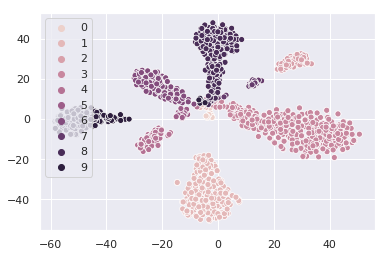

In [131]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x='sne-x', y='sne-y', hue='target', legend="full", data=results_arr)
plt.savefig(opt.out_name)

### seaborn example

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

In [ ]:
tips['tip'].shape
tips


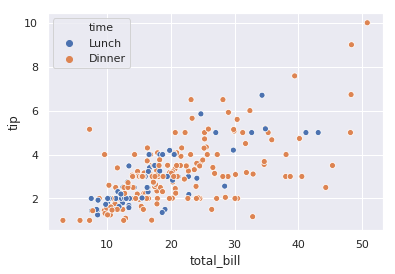

In [11]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time",
                      data=tips)

/home/yoyee/Documents/CSE252C_advanced_computer_vision/hw/hw2/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
/home/yoyee/Documents/CSE252C_advanced_computer_vision/hw/hw2/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
/home/yoyee/Documents/CSE252C_advanced_computer_vision/hw/hw2/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M

image_cpu:  torch.Size([1, 3, 112, 92])


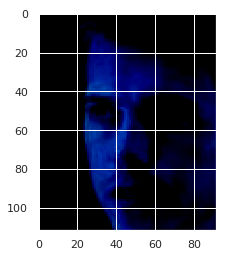

target_cpu:  tensor([[9364]])
pred  0  : torch.Size([1, 10574])
pred  1  : torch.Size([1, 10574])
pred : (tensor([[-0.2610, -0.4723, -0.1166,  ...,  0.0651, -0.2415,  0.0769]],
       grad_fn=<MulBackward0>), tensor([[-14.4339, -14.6902, -14.3428,  ..., -14.3130, -14.4175, -14.3101]],
       grad_fn=<MulBackward0>))


In [22]:
iteration = 0
import torch
from torch.autograd import Variable
imBatch = Variable(torch.FloatTensor(opt.batchSize, 3, opt.imHeight, opt.imWidth) )
targetBatch = Variable(torch.LongTensor(opt.batchSize, 1) )

for i, dataBatch in enumerate(faceLoader):
    iteration += 1
    if iteration > 1: break

    # Read data
    image_cpu = dataBatch['img']
    print("image_cpu: ", image_cpu.shape)
    plt.imshow(image_cpu[0].transpose(0,1).transpose(1,2).numpy())
    plt.show()
    imBatch.data.resize_(image_cpu.size() )
    imBatch.data.copy_(image_cpu )

    
    target_cpu = dataBatch['target']
    print("target_cpu: ", target_cpu)
    targetBatch.data.resize_(target_cpu.size() )
    targetBatch.data.copy_(target_cpu )

    pred = net(imBatch)
#     print("pred: ", pred[0].shape)
    for i in range(len(pred)):
        print("pred ", i, " :", pred[i].shape)
    print("pred :", pred)
        
    
    # Train network
#     optimizer.zero_grad()

#     pred = net(imBatch )
#     loss, accuracy = lossLayer(pred, targetBatch )
#     loss.backward()